In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

In [2]:
file_path = r"C:\Users\mkiarie\Documents\DATA SCIENCE WANJA\chip_dataset.csv"

In [3]:
df = pd.read_csv(file_path)
ordf =df

In [4]:
df.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [6]:
cols = df.columns
print(cols)

Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)',
       'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')


In [7]:
df.describe()

,Unnamed: 0,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4854.000000,4845.000000,4228.000000,4139.000000,4143.000000,4854.000000,536.000000,1948.000000,1306.000000
mean,2426.500000,55.109598,81.359981,188.440445,1929.922279,1484.406057,8397.459851,2134.756653,363.670511
std,1401.373433,44.998676,76.807808,126.189383,4044.891098,1066.701523,13799.551131,3898.431487,1145.931856
min,0.000000,0.000000,1.000000,1.000000,8.000000,100.000000,10.020000,12.800000,3.600000
25%,1213.250000,22.000000,33.000000,104.000000,154.000000,590.000000,768.800000,257.300000,38.295000
50%,2426.500000,40.000000,65.000000,148.000000,624.000000,1073.500000,2965.500000,696.000000,89.280000
75%,3639.750000,90.000000,100.000000,239.000000,1550.000000,2400.000000,10600.000000,2116.750000,220.000000
max,4853.000000,250.000000,900.000000,826.000000,54200.000000,4700.000000,184600.000000,40000.000000,11540.000000


Index(['Unnamed: 0', 'Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)',
       'Transistors (million)', 'Freq (MHz)', 'FP16 GFLOPS', 'FP32 GFLOPS',
       'FP64 GFLOPS'],
      dtype='object')


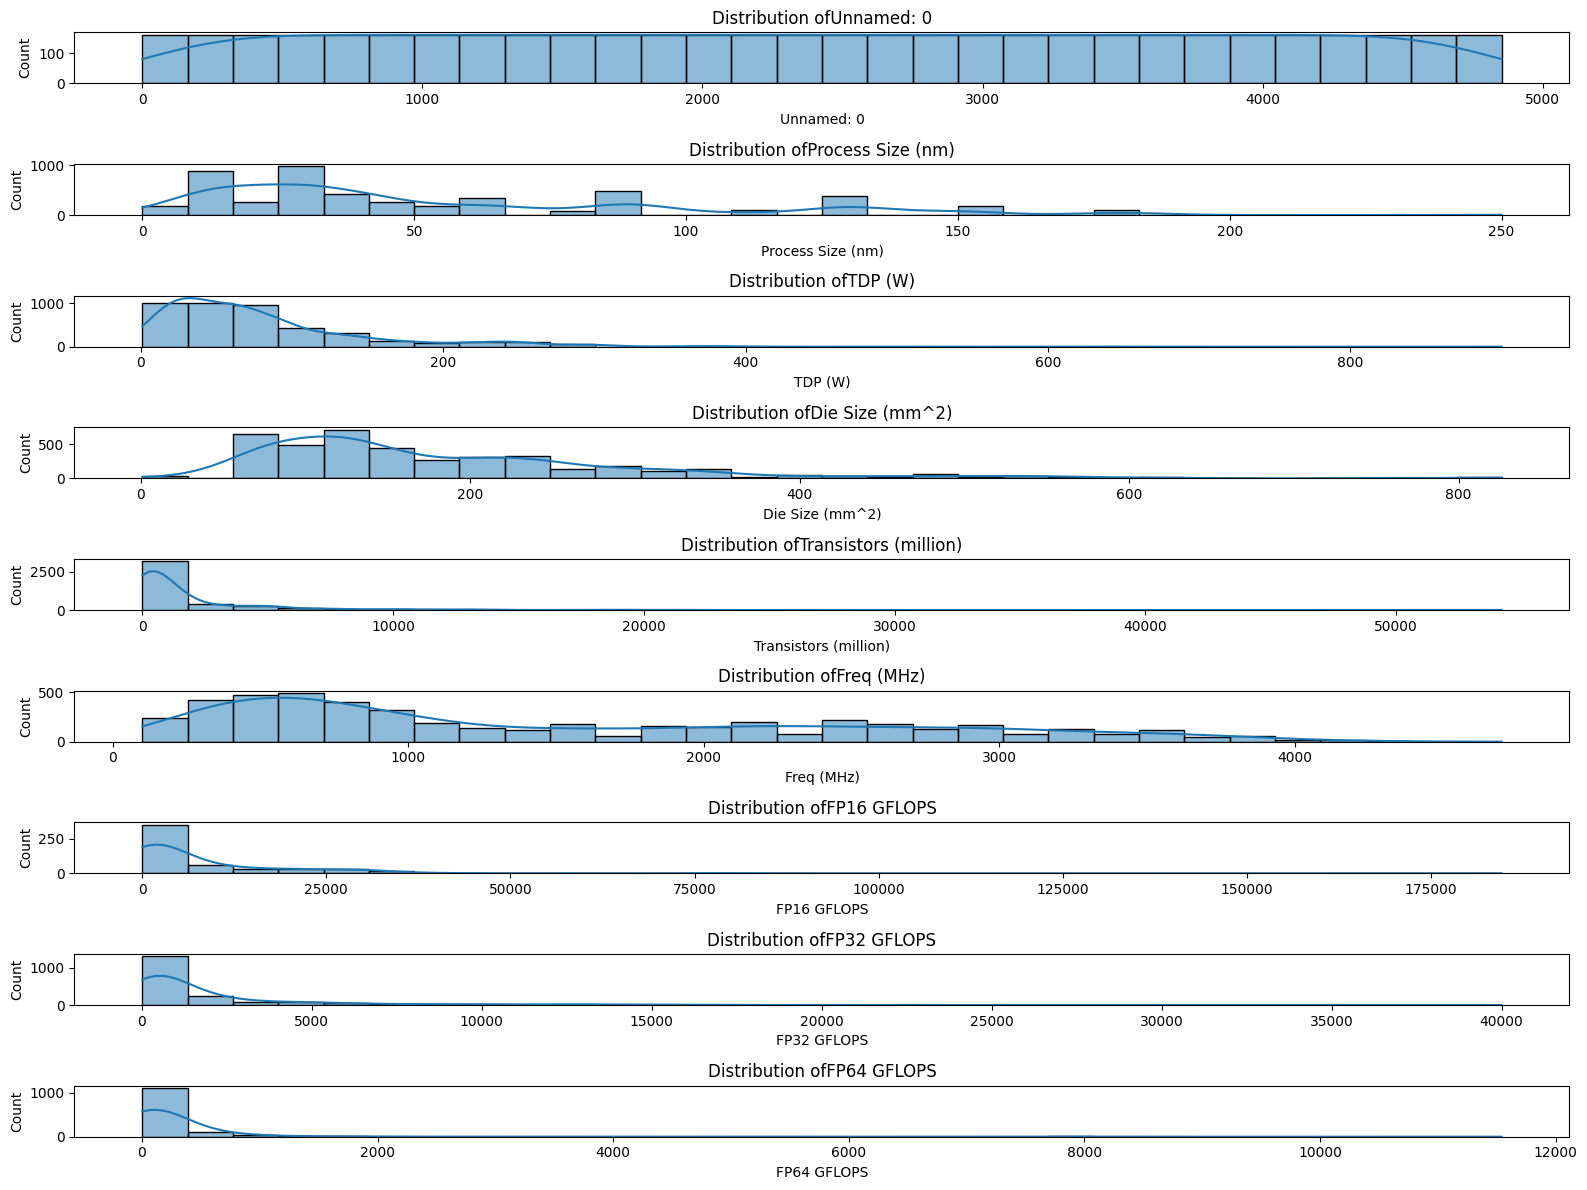

In [8]:
#checking on the distribution of the data

numeric_columns = (df.select_dtypes(include=[np.number]).columns)

print(numeric_columns)

# Plot histograms for each numerical column

num_plots = len(numeric_columns)
plt.figure(figsize=(16, 12))

for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i +1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of{column}')


plt.tight_layout()
plt.show()


HANDLING MISSING DATA

In [9]:
missing_data = df.isnull().sum()

print(missing_data)

Unnamed: 0                  0
Product                     0
Type                        0
Release Date                0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64


In [10]:
#checking the percentage of missing data

percentage_missing = df.isnull().mean()*100

print(percentage_missing)

Unnamed: 0                0.000000
Product                   0.000000
Type                      0.000000
Release Date              0.000000
Process Size (nm)         0.185414
TDP (W)                  12.896580
Die Size (mm^2)          14.730119
Transistors (million)    14.647713
Freq (MHz)                0.000000
Foundry                   0.000000
Vendor                    0.000000
FP16 GFLOPS              88.957561
FP32 GFLOPS              59.868150
FP64 GFLOPS              73.094355
dtype: float64


plotting missingness

<Axes: >

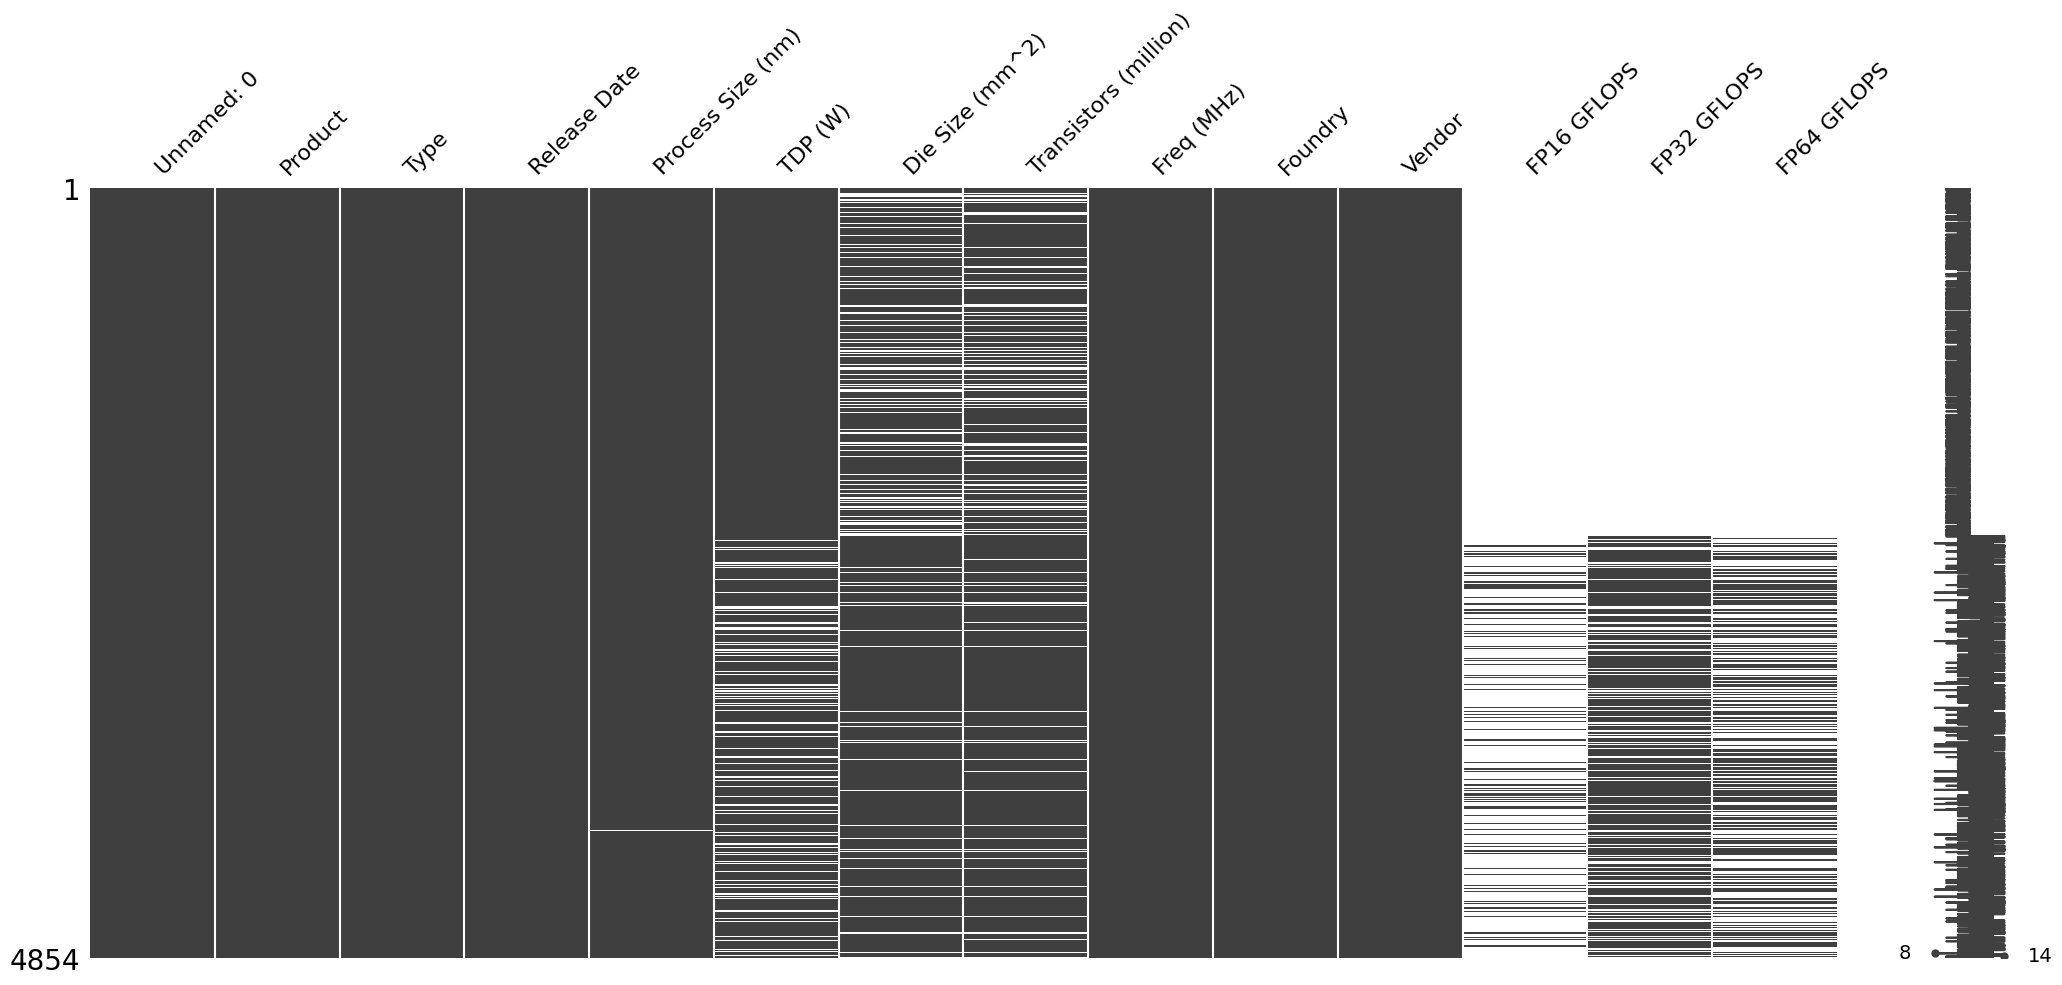

In [11]:
msno.matrix(df)

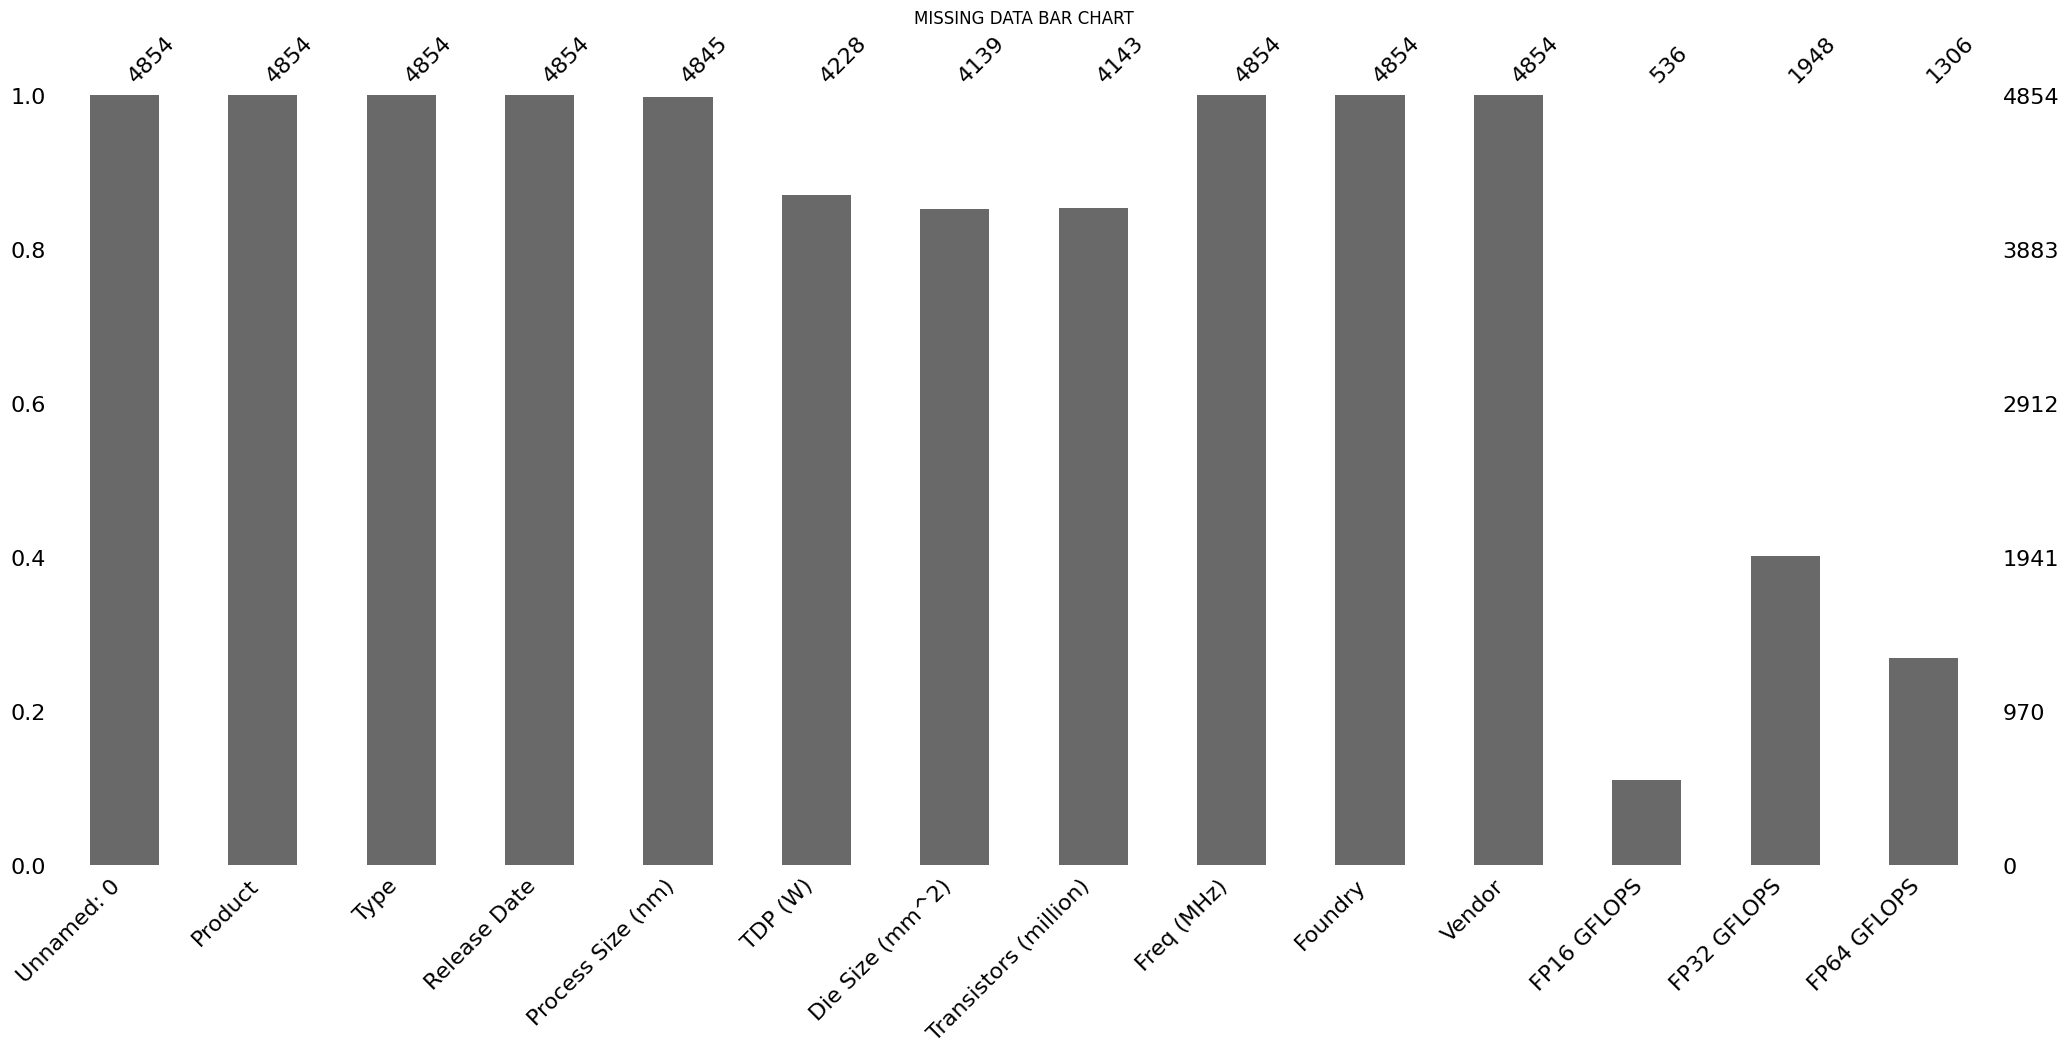

In [12]:
plt.figure(figsize=(14,8))
msno.bar(df)


plt.title('MISSING DATA BAR CHART')
plt.show()

how to deal with the missingness 

In [13]:
#creating a thresh hold for acceptable missing data

threshold = 0.18

df_missing = df.loc[:, percentage_missing > threshold]
print(df_missing.info())
#So none of the columns is clipped because none reaches the treshold set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Process Size (nm)      4845 non-null   float64
 1   TDP (W)                4228 non-null   float64
 2   Die Size (mm^2)        4139 non-null   float64
 3   Transistors (million)  4143 non-null   float64
 4   FP16 GFLOPS            536 non-null    float64
 5   FP32 GFLOPS            1948 non-null   float64
 6   FP64 GFLOPS            1306 non-null   float64
dtypes: float64(7)
memory usage: 265.6 KB
None


In [14]:
df_missing.head()


,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,65.0,45.0,77.0,122.0,NaN,NaN,NaN
1,14.0,35.0,192.0,4800.0,NaN,NaN,NaN
2,10.0,28.0,NaN,NaN,NaN,NaN,NaN
3,22.0,80.0,160.0,1400.0,NaN,NaN,NaN
4,45.0,125.0,258.0,758.0,NaN,NaN,NaN


filling the missing values with (mean,mode, meadian)

In [15]:
#fillng values with mean
df_missing.fillna(df_missing.mean(), inplace=True) 

C:\Users\mkiarie\AppData\Local\Temp\ipykernel_23564\1795057762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing.fillna(df_missing.mean(), inplace=True)


In [16]:
df_missing.isnull().mean()*100

Process Size (nm)        0.0
TDP (W)                  0.0
Die Size (mm^2)          0.0
Transistors (million)    0.0
FP16 GFLOPS              0.0
FP32 GFLOPS              0.0
FP64 GFLOPS              0.0
dtype: float64

In [17]:
columns_below_threshold = percentage_missing[percentage_missing <= threshold].index
df_others = df.loc[: , columns_below_threshold]
df_others.isnull().sum()

Unnamed: 0      0
Product         0
Type            0
Release Date    0
Freq (MHz)      0
Foundry         0
Vendor          0
dtype: int64

In [18]:
df_others.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4854 non-null   int64  
 1   Product       4854 non-null   object 
 2   Type          4854 non-null   object 
 3   Release Date  4854 non-null   object 
 4   Freq (MHz)    4854 non-null   float64
 5   Foundry       4854 non-null   object 
 6   Vendor        4854 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 265.6+ KB


combining the columns

In [19]:
df2 = pd.concat([df_others,df_missing], axis=1)

In [20]:
df2.isnull().sum()

Unnamed: 0               0
Product                  0
Type                     0
Release Date             0
Freq (MHz)               0
Foundry                  0
Vendor                   0
Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
FP16 GFLOPS              0
FP32 GFLOPS              0
FP64 GFLOPS              0
dtype: int64

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Freq (MHz)             4854 non-null   float64
 5   Foundry                4854 non-null   object 
 6   Vendor                 4854 non-null   object 
 7   Process Size (nm)      4854 non-null   float64
 8   TDP (W)                4854 non-null   float64
 9   Die Size (mm^2)        4854 non-null   float64
 10  Transistors (million)  4854 non-null   float64
 11  FP16 GFLOPS            4854 non-null   float64
 12  FP32 GFLOPS            4854 non-null   float64
 13  FP64 GFLOPS            4854 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

<Axes: >

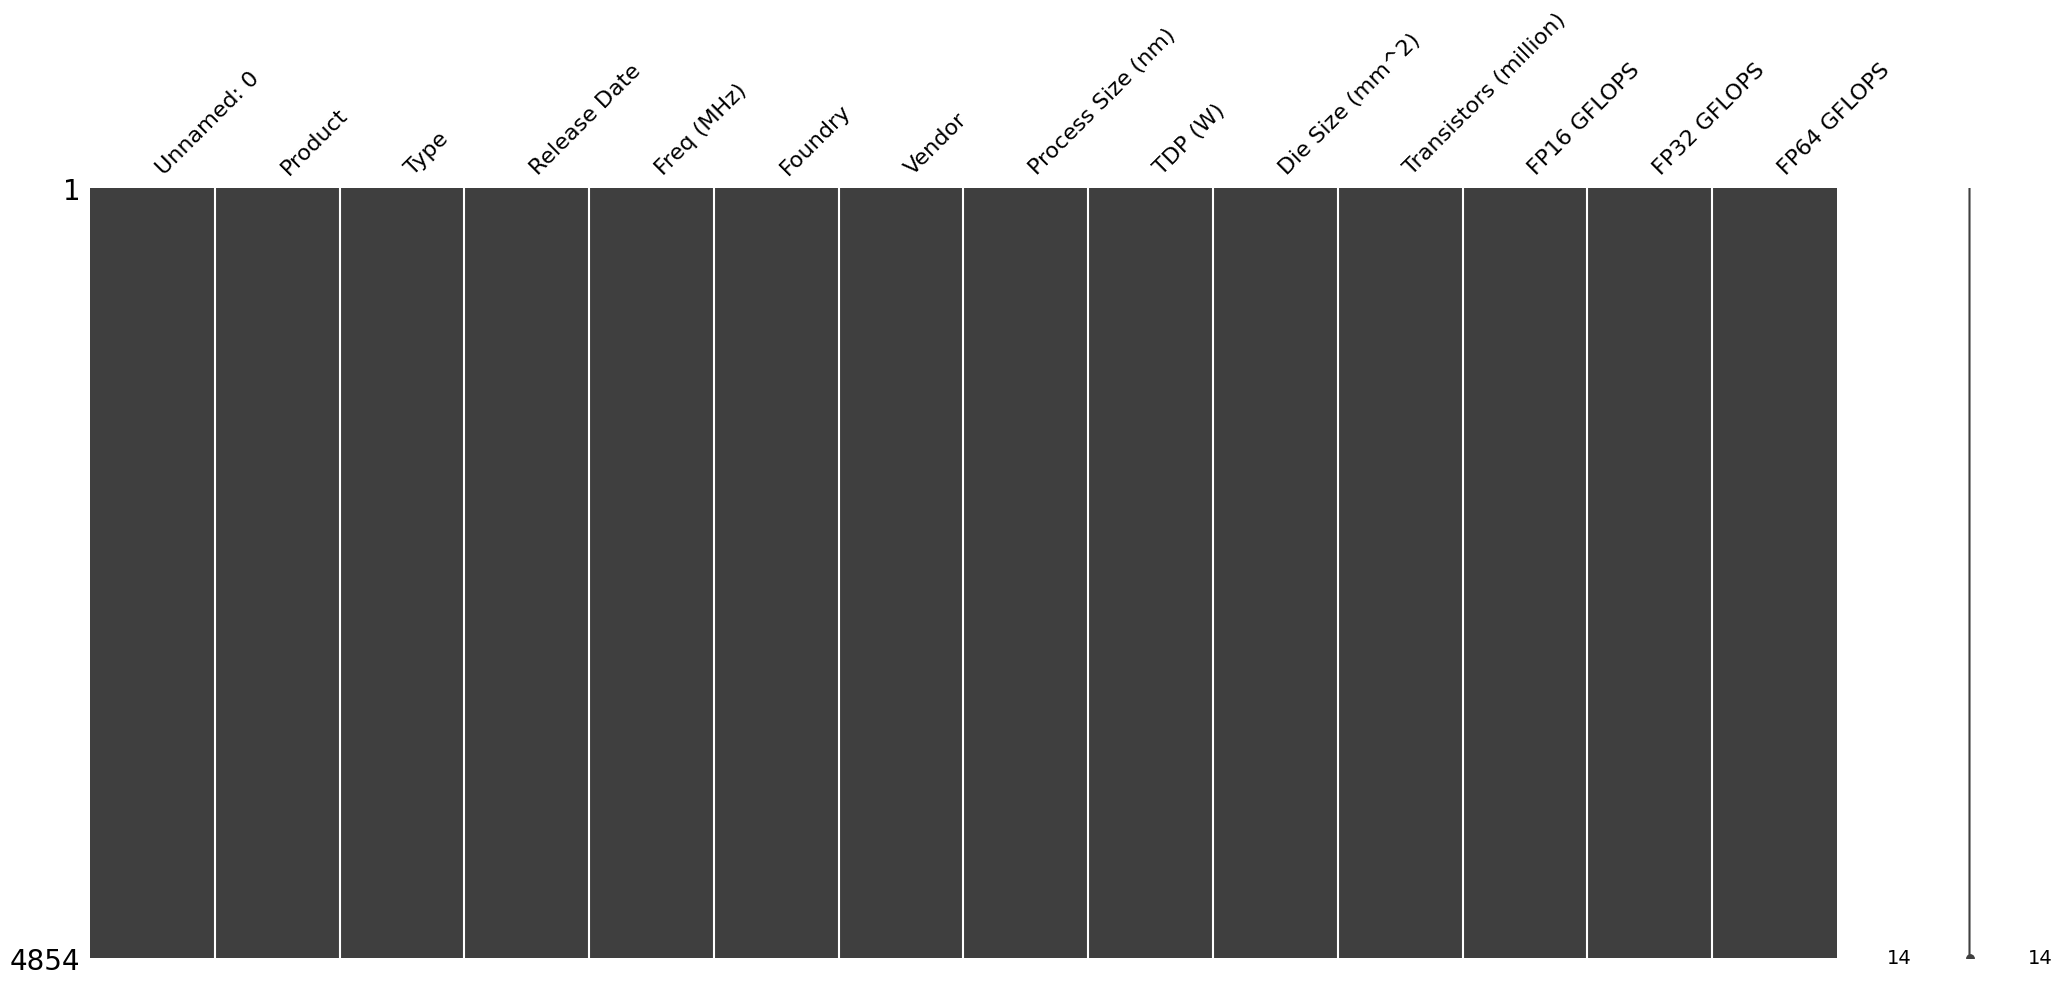

In [22]:
msno.matrix(df2)

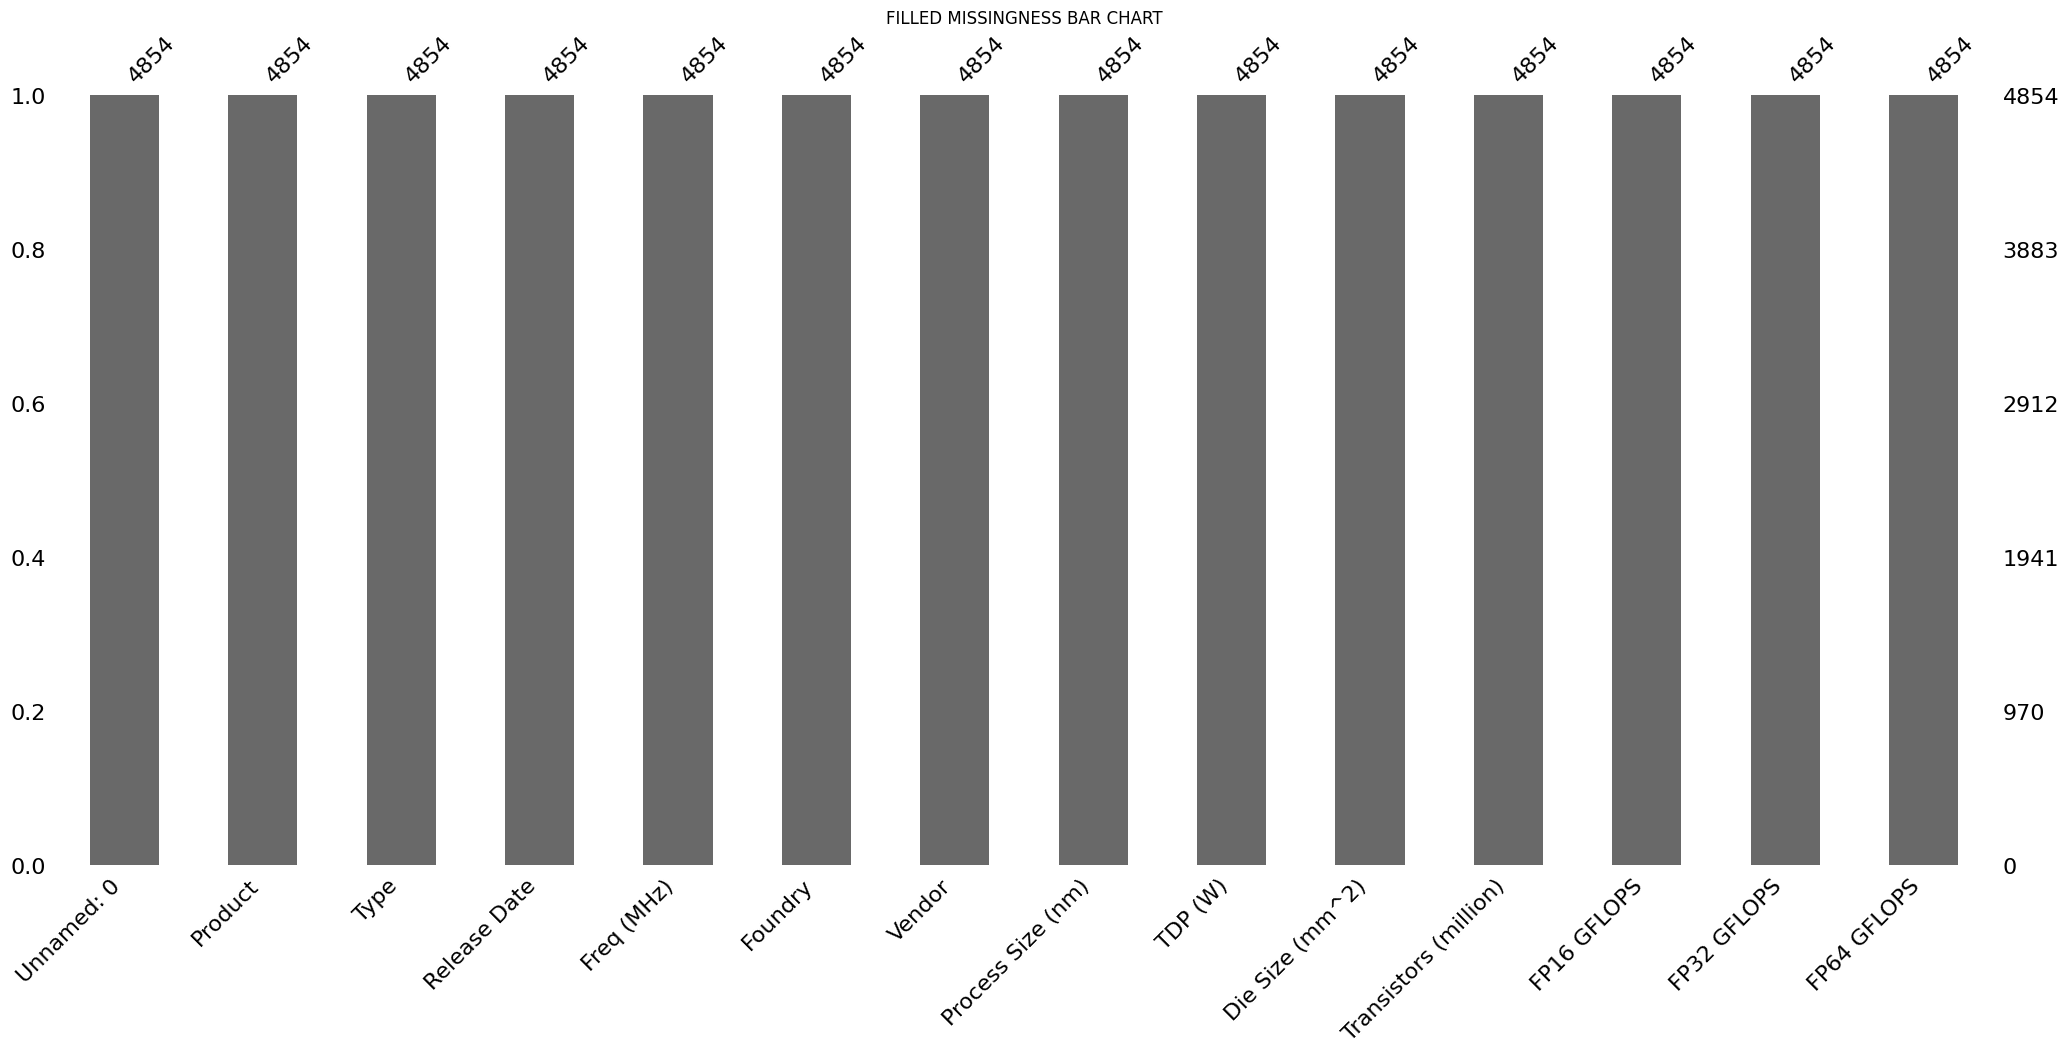

In [23]:
plt.figure(figsize= (14, 8))
msno.bar(df2)

plt.title('FILLED MISSINGNESS BAR CHART')
plt.show()

In [24]:
ordf.head()
ordf.isnull().sum()

Unnamed: 0                  0
Product                     0
Type                        0
Release Date                0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64

removing duplicates

In [25]:
duplicates = df2.duplicated()

In [26]:
duplicates.sum()

print(f'numberof duplicates :{duplicates}')
#there are no duplicates in this data set

numberof duplicates :0       False
1       False
2       False
3       False
4       False
        ...  
4849    False
4850    False
4851    False
4852    False
4853    False
Length: 4854, dtype: bool


Moore's law is the observation that the number of transistors in a dense integrated circuit (IC) doubles about every two years. Moore's law is an observation and projection of a historical trend. Rather than a law of physics, it is an empirical relationship linked to gains from experience in production.

Handle outliers

In [27]:
num_cols = (df2.select_dtypes(include=[np.number]).columns)
print(num_cols)

Index(['Unnamed: 0', 'Freq (MHz)', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'FP16 GFLOPS',
       'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')


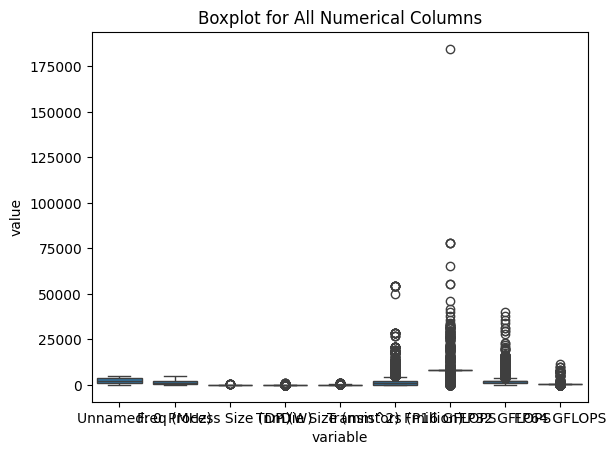

In [28]:
#handling outliers

# Reshape the DataFrame from wide to long format (combining the box plots to one)
df_melted = pd.melt(df2, value_vars=num_cols)

# Plot the boxplot
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Boxplot for All Numerical Columns')
plt.show()


In [29]:
num_cols = (df2.select_dtypes(include=[np.number]).columns)
print(num_cols)

Index(['Unnamed: 0', 'Freq (MHz)', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'FP16 GFLOPS',
       'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')


In [30]:
categorical_cols = df2.select_dtypes(include=[object]).columns
print(categorical_cols)


Index(['Product', 'Type', 'Release Date', 'Foundry', 'Vendor'], dtype='object')


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Freq (MHz)             4854 non-null   float64
 5   Foundry                4854 non-null   object 
 6   Vendor                 4854 non-null   object 
 7   Process Size (nm)      4854 non-null   float64
 8   TDP (W)                4854 non-null   float64
 9   Die Size (mm^2)        4854 non-null   float64
 10  Transistors (million)  4854 non-null   float64
 11  FP16 GFLOPS            4854 non-null   float64
 12  FP32 GFLOPS            4854 non-null   float64
 13  FP64 GFLOPS            4854 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

Standardizing or Normalizing the dataset

In [32]:
# Ensure num_cols is a list of column names
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()

#scaler application
df2[num_cols] = scaler.fit_transform(df2[num_cols])

print(df2.head())


   Unnamed: 0                  Product Type Release Date  Freq (MHz)  Foundry  \
0   -1.731694      AMD Athlon 64 3500+  CPU   2007-02-20    0.670917  Unknown   
1   -1.730980         AMD Athlon 200GE  CPU   2018-09-06    1.608482  Unknown   
2   -1.730267     Intel Core i5-1145G7  CPU   2020-09-02    1.045943    Intel   
3   -1.729553    Intel Xeon E5-2603 v2  CPU   2013-09-01    0.295890    Intel   
4   -1.728839  AMD Phenom II X4 980 BE  CPU   2011-05-03    2.077265  Unknown   

  Vendor  Process Size (nm)   TDP (W)  Die Size (mm^2)  Transistors (million)  \
0    AMD           0.220020 -0.507285    -9.564773e-01          -4.838578e-01   
1    AMD          -0.914516 -0.646802     3.055115e-02           7.681246e-01   
2  Intel          -1.003499 -0.744465    -2.439394e-16           6.085247e-17   
3  Intel          -0.736550 -0.018974    -2.441002e-01          -1.418241e-01   
4    AMD          -0.224896  0.608854     5.970196e-01          -3.136439e-01   

    FP16 GFLOPS  FP32 GFLO

Here's a breakdown of how each of the listed attributes relates to Moore's Law:

'Freq (MHz)': The clock frequency (measured in megahertz or gigahertz) affects the speed of the processor but is not directly related to Moore's Law, which focuses on transistor density rather than clock speed.

'Process Size (nm)': This is directly related to Moore's Law. As the process size (or feature size) decreases, more transistors can fit on a chip, which is in line with Moore's observation.

'TDP (W)': The Thermal Design Power (TDP) represents the maximum amount of heat generated by the chip. While important for thermal management, it doesn't directly affect Moore's Law.

'Die Size (mm^2)': The die size can be indirectly related to Moore's Law, as a smaller process size allows for more transistors to fit within a given die size. However, Moore's Law is more about transistor density than die size per se.

'Transistors (million)': This is a key factor in Moore's Law. Moore's Law specifically relates to the increase in transistor count on a chip over time.

'FP16 GFLOPS': This measures floating-point operations per second for 16-bit precision. While it reflects the chip's performance, it is not a factor in Moore's Law.

'FP32 GFLOPS': Similar to FP16 GFLOPS, this measures performance for 32-bit precision and is related to performance metrics, not Moore's Law.

'FP64 GFLOPS': This measures performance for 64-bit precision and, like FP16 and FP32 GFLOPS, is related to performance metrics rather than transistor density.

In summary, 'Freq (MHz)', 'TDP (W)', 'FP16 GFLOPS', 'FP32 GFLOPS', and 'FP64 GFLOPS' do not directly affect Moore's Law. The attributes that are most relevant are 'Process Size (nm)' and 'Transistors (million)'.

Drop non-consequential fields (assuming fields with high missing percentage or irrelevant data)


In [33]:
non_consequential_fields = percentage_missing[percentage_missing > 10].index
print(non_consequential_fields)


Index(['TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'FP16 GFLOPS',
       'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')


In [34]:
df2.drop(columns=non_consequential_fields, inplace=True)


In [35]:
df2. head()

,Unnamed: 0,Product,Type,Release Date,Freq (MHz),Foundry,Vendor,Process Size (nm)
0,-1.731694,AMD Athlon 64 3500+,CPU,2007-02-20,0.670917,Unknown,AMD,0.220020
1,-1.730980,AMD Athlon 200GE,CPU,2018-09-06,1.608482,Unknown,AMD,-0.914516
2,-1.730267,Intel Core i5-1145G7,CPU,2020-09-02,1.045943,Intel,Intel,-1.003499
3,-1.729553,Intel Xeon E5-2603 v2,CPU,2013-09-01,0.295890,Intel,Intel,-0.736550
4,-1.728839,AMD Phenom II X4 980 BE,CPU,2011-05-03,2.077265,Unknown,AMD,-0.224896


Transform temporal data to their corrrect format (date time)


In [36]:
date_column = 'Release Date'
if date_column in df2.columns:
    df2[date_column] = pd.to_datetime(df2[date_column])

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         4854 non-null   float64       
 1   Product            4854 non-null   object        
 2   Type               4854 non-null   object        
 3   Release Date       4779 non-null   datetime64[ns]
 4   Freq (MHz)         4854 non-null   float64       
 5   Foundry            4854 non-null   object        
 6   Vendor             4854 non-null   object        
 7   Process Size (nm)  4854 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 303.5+ KB


Perfom a full EDA and demonstrate the validity of the following assumptions


1) #Moore's Law still holds, especially in GPUs.


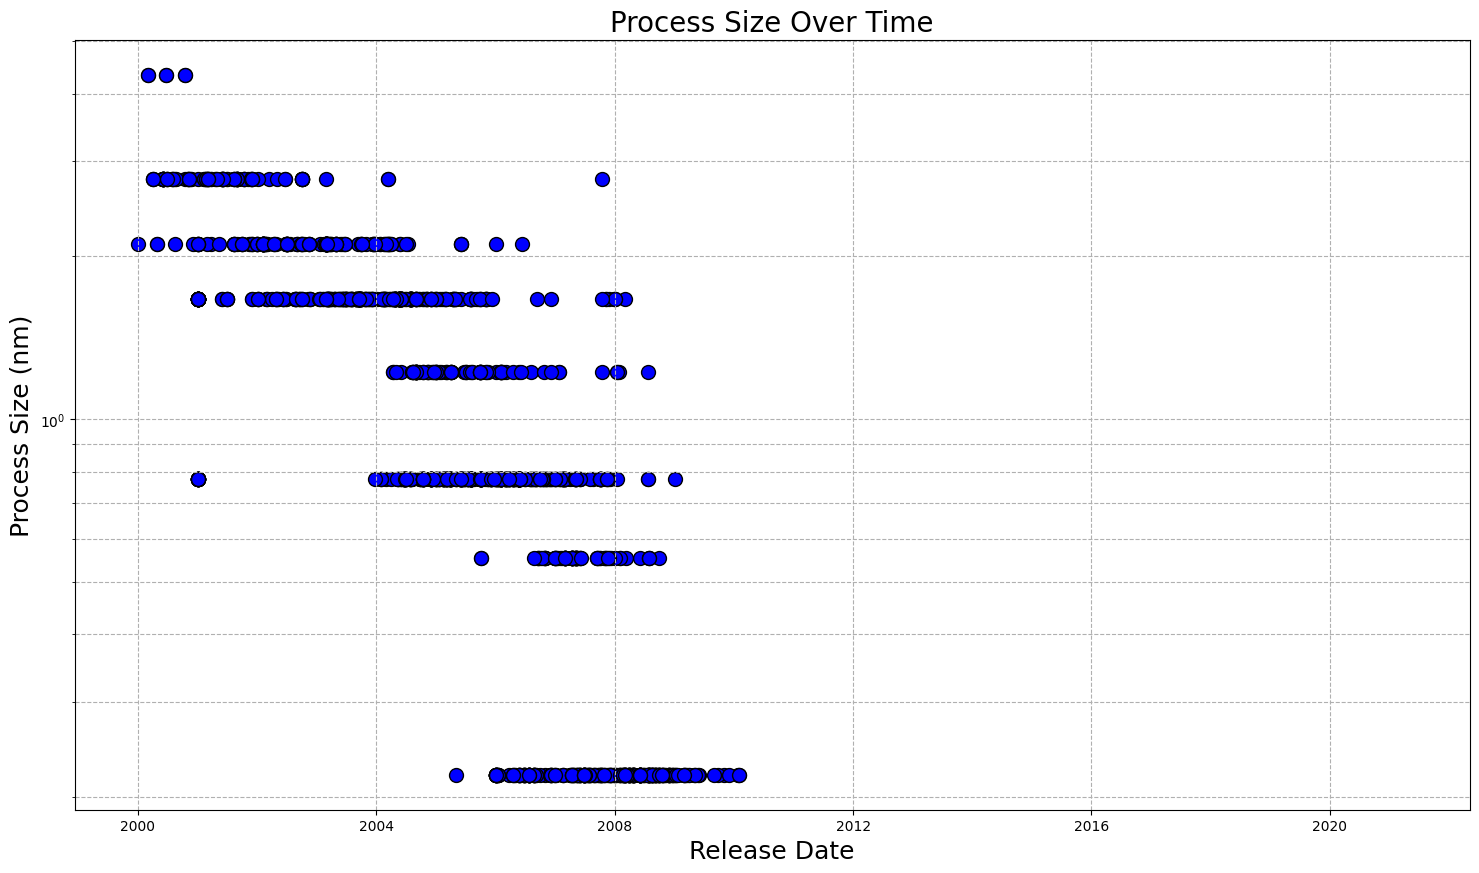

In [38]:

# Plotting the scatter plot
plt.figure(figsize=(18, 10))
plt.scatter(df2['Release Date'], df2['Process Size (nm)'], color='blue', s=100, edgecolors='black')

# Adding titles and labels
plt.title('Process Size Over Time', fontsize=20)
plt.xlabel('Release Date', fontsize=18)
plt.ylabel('Process Size (nm)', fontsize=18)

# Log scale for Y-axis to clearly see the trend of shrinking process sizes
plt.yscale('log')

plt.grid(True, which="both", ls="--")
plt.show()


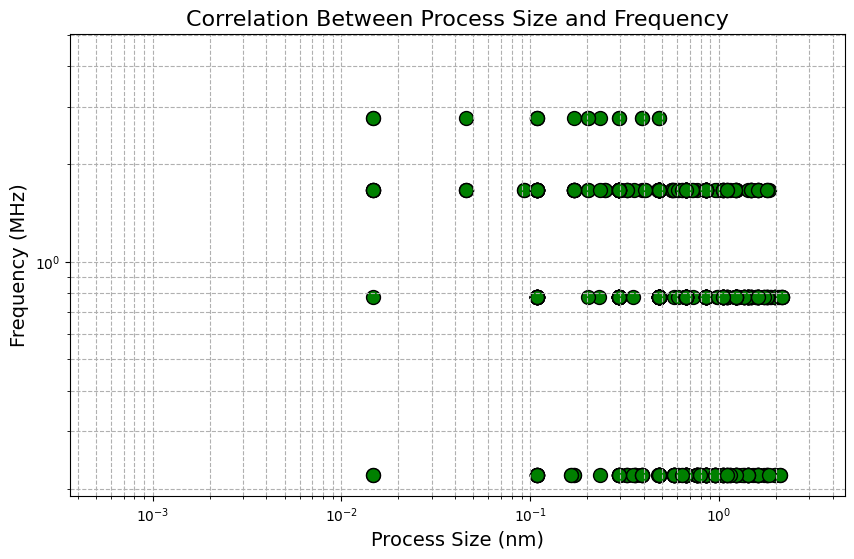

In [39]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['Freq (MHz)'],df2['Process Size (nm)'], color='green', s=100, edgecolors='black')

# Adding titles and labels
plt.title('Correlation Between Process Size and Frequency', fontsize=16)
plt.xlabel('Process Size (nm)', fontsize=14)
plt.ylabel('Frequency (MHz)', fontsize=14)

# Log scale for both axes to capture the exponential relationship
plt.xscale('log')
plt.yscale('log')

plt.grid(True, which="both", ls="--")
plt.show()


2)Dannard Scaling is still valid in general.


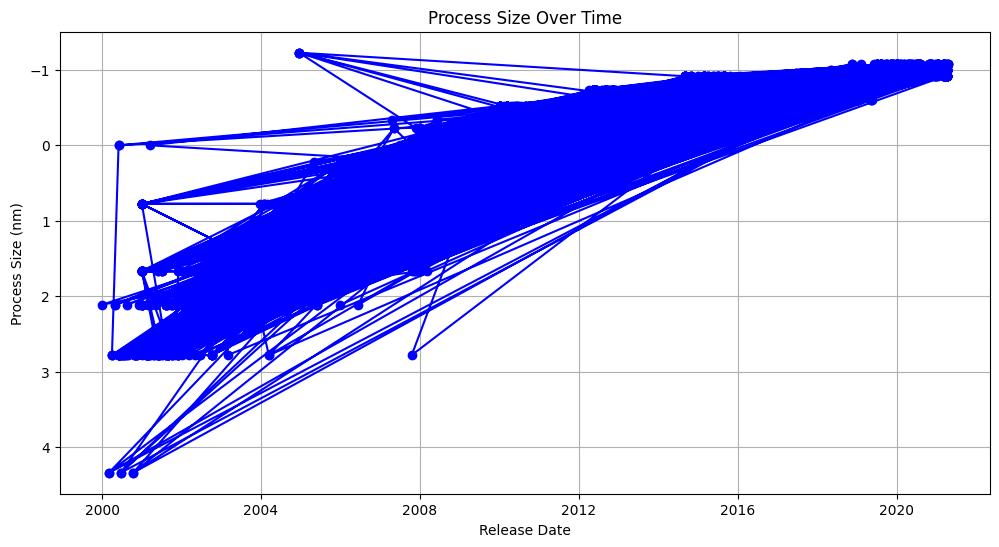

In [40]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df2['Release Date'], df2['Process Size (nm)'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Release Date')
plt.ylabel('Process Size (nm)')
plt.title('Process Size Over Time')
plt.gca().invert_yaxis()  # Invert y-axis to show decreasing process size upwards
plt.grid(True)

# Show plot
plt.show()


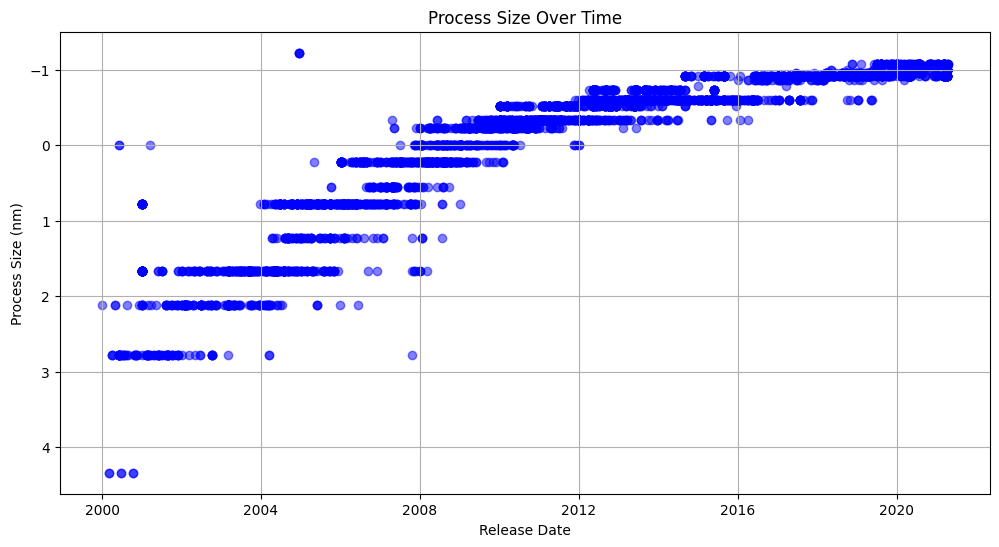

In [41]:
plt.figure(figsize=(12, 6))

# Scatter plot with transparency (adjust alpha value for desired opacity)
plt.scatter(df2['Release Date'], df2['Process Size (nm)'], marker='o', alpha=0.5, color='b')

# Adding labels and title
plt.xlabel('Release Date')
plt.ylabel('Process Size (nm)')
plt.title('Process Size Over Time')
plt.gca().invert_yaxis()  # Invert y-axis to show decreasing process size upwards
plt.grid(True)

# Show plot
plt.show()

3)CPUs have higher frequencies, but GPUs are catching up.


In [42]:
df2.head()

,Unnamed: 0,Product,Type,Release Date,Freq (MHz),Foundry,Vendor,Process Size (nm)
0,-1.731694,AMD Athlon 64 3500+,CPU,2007-02-20,0.670917,Unknown,AMD,0.220020
1,-1.730980,AMD Athlon 200GE,CPU,2018-09-06,1.608482,Unknown,AMD,-0.914516
2,-1.730267,Intel Core i5-1145G7,CPU,2020-09-02,1.045943,Intel,Intel,-1.003499
3,-1.729553,Intel Xeon E5-2603 v2,CPU,2013-09-01,0.295890,Intel,Intel,-0.736550
4,-1.728839,AMD Phenom II X4 980 BE,CPU,2011-05-03,2.077265,Unknown,AMD,-0.224896


C:\Users\mkiarie\AppData\Local\Temp\ipykernel_23564\3167366855.py:7: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(gpu_data['Process Size (nm)'], gpu_data['Freq (MHz)'], color='red', label='GPU', s=100, edgecolors='black', marker='x')


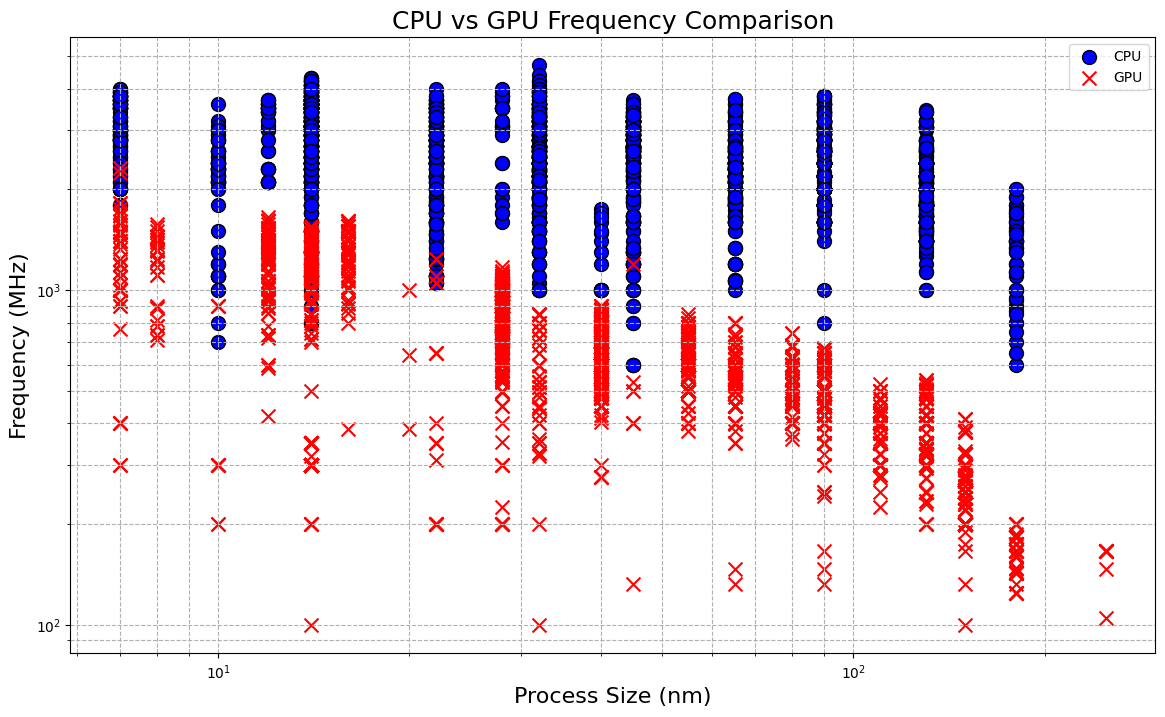

In [43]:
# Plotting the scatter plot
plt.figure(figsize=(14, 8))  # Increase the size of the figure
cpu_data = df[df['Type'] == 'CPU']
gpu_data = df[df['Type'] == 'GPU']

plt.scatter(cpu_data['Process Size (nm)'], cpu_data['Freq (MHz)'], color='blue', label='CPU', s=100, edgecolors='black', marker='o')
plt.scatter(gpu_data['Process Size (nm)'], gpu_data['Freq (MHz)'], color='red', label='GPU', s=100, edgecolors='black', marker='x')

# Adding titles and labels
plt.title('CPU vs GPU Frequency Comparison', fontsize=18)
plt.xlabel('Process Size (nm)', fontsize=16)
plt.ylabel('Frequency (MHz)', fontsize=16)

# Log scale for both axes to capture the exponential relationship
plt.xscale('log')
plt.yscale('log')

# Adding a legend
plt.legend()

# Displaying the plot
plt.grid(True, which="both", ls="--")
plt.show()


Calculate and visualized the correlation among the features


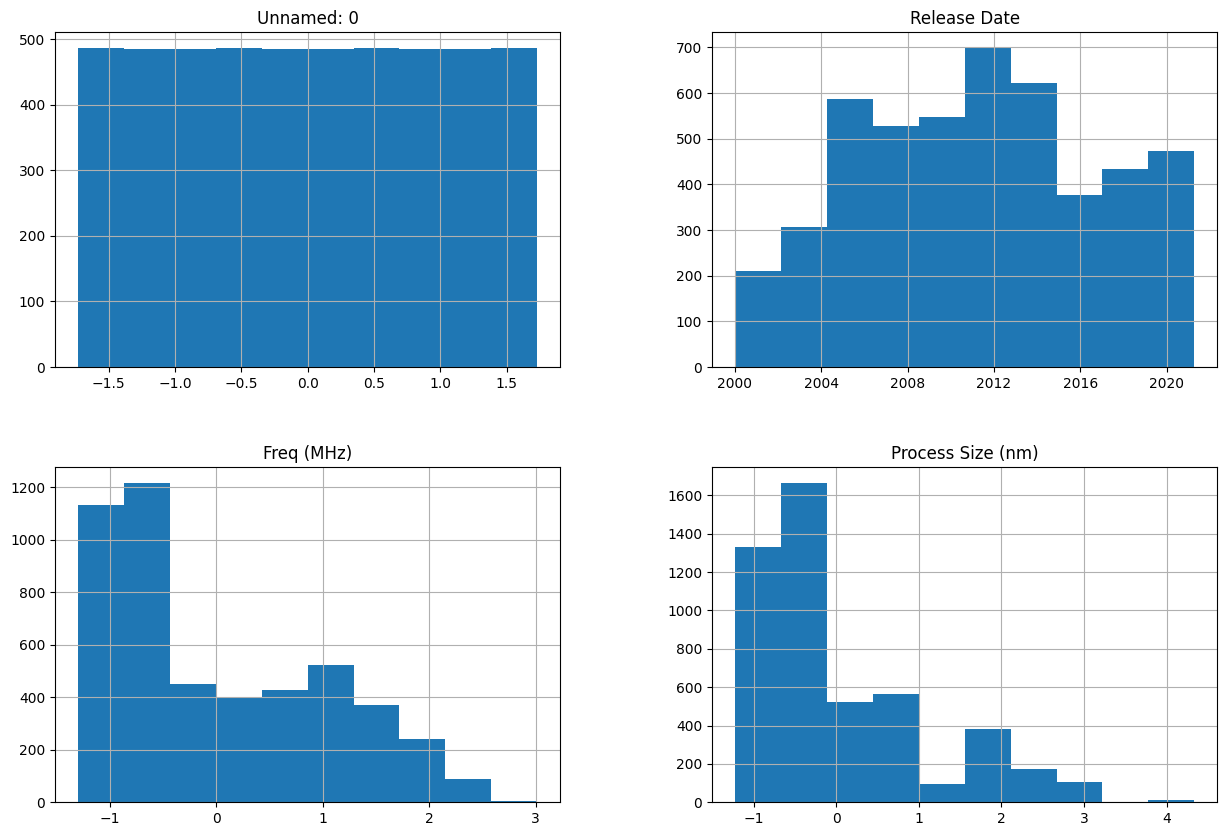

In [44]:
#univariate analysis
df2.hist(figsize=(15, 10))
plt.show()


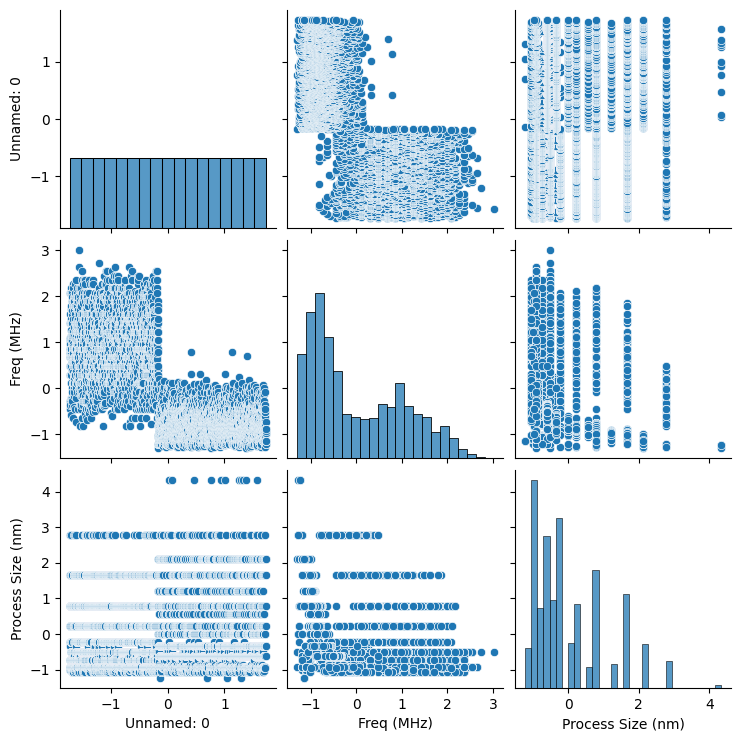

In [45]:
#bivariate analysis

sns.pairplot(df2)
plt.show()


7)Perfom the correct encoding for your data, in readiness for modelling.


In [46]:
df2.head()
#will use a one-hot encoder because the categorical values have no inherent order

,Unnamed: 0,Product,Type,Release Date,Freq (MHz),Foundry,Vendor,Process Size (nm)
0,-1.731694,AMD Athlon 64 3500+,CPU,2007-02-20,0.670917,Unknown,AMD,0.220020
1,-1.730980,AMD Athlon 200GE,CPU,2018-09-06,1.608482,Unknown,AMD,-0.914516
2,-1.730267,Intel Core i5-1145G7,CPU,2020-09-02,1.045943,Intel,Intel,-1.003499
3,-1.729553,Intel Xeon E5-2603 v2,CPU,2013-09-01,0.295890,Intel,Intel,-0.736550
4,-1.728839,AMD Phenom II X4 980 BE,CPU,2011-05-03,2.077265,Unknown,AMD,-0.224896


In [47]:
# One-hot encode categorical columns
data = pd.get_dummies(df2, columns=categorical_cols)

# Display the first few rows to check the transformation
print(df2.head())

   Unnamed: 0                  Product Type Release Date  Freq (MHz)  Foundry  \
0   -1.731694      AMD Athlon 64 3500+  CPU   2007-02-20    0.670917  Unknown   
1   -1.730980         AMD Athlon 200GE  CPU   2018-09-06    1.608482  Unknown   
2   -1.730267     Intel Core i5-1145G7  CPU   2020-09-02    1.045943    Intel   
3   -1.729553    Intel Xeon E5-2603 v2  CPU   2013-09-01    0.295890    Intel   
4   -1.728839  AMD Phenom II X4 980 BE  CPU   2011-05-03    2.077265  Unknown   

  Vendor  Process Size (nm)  
0    AMD           0.220020  
1    AMD          -0.914516  
2  Intel          -1.003499  
3  Intel          -0.736550  
4    AMD          -0.224896  
